In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *
from analysis import *

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU: ", device)
else:
    device = torch.device("cpu")
    print("Running on CPU")

torch.set_default_device(device)
# torch.cuda.synchronize()

Running on GPU:  cuda:0


/home/users/mattisdo/.pyenv/versions/3.10.12/envs/env/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/users/mattisdo/.pyenv/versions/3.10.12/envs/env/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/users/mattisdo/.pyenv/vers

Running on GPU:  cuda:0


## Model

100%|██████████| 5000/5000 [03:50<00:00, 21.73it/s]


Last training time steps: 101
Losses array was not a multiple of average. Truncated to 4980


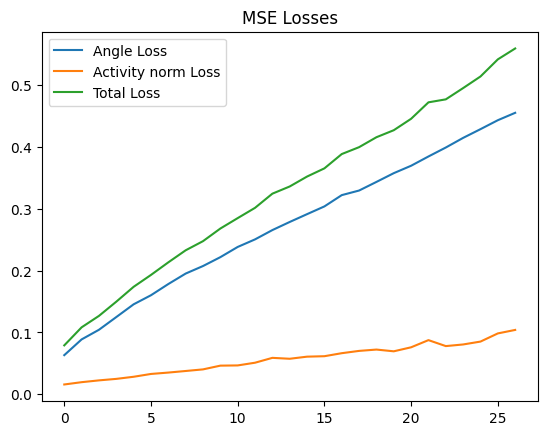

In [14]:
hidden_size = 128
input_size = 1
nav_size = 1

model1 = RNN_circular_LowEtAl_bridged(input_size,hidden_size,lr=0.0001,irnn=True,outputnn=False,Wx_normalize=False,activation=True,bias=False,nav_space=1,batch_size=64).to(device)
# model1 = torch.compile(model1)

train = True

if train:
    _ = model1.train_gradual(epochs=10000)
    # model1.base_training_tsteps = 40
    # _ = model1.train(epochs=10000)
    model1.plot_losses(average=30)
else:
    model1.load_state_dict(torch.load("../trained models/LowEtAl_bridged_10000gradual+2000base.pt"))

# torch.save(model1.state_dict(), "../trained models/LowEtAl_bridged_reduced_Gradual_lossiequaloroverj_maskonangle_lossscale_4000gradual.pt")

100%|██████████| 2000/2000 [02:14<00:00, 14.87it/s]


Losses array was not a multiple of average. Truncated to 7320


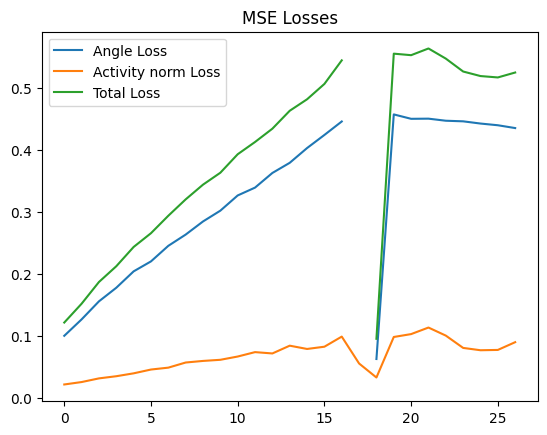

In [27]:
model1.base_training_tsteps = 100
_ = model1.train(epochs=2000)
model1.plot_losses(average=30)

In [30]:
# torch.save(model1.state_dict(), "../trained models/LowEtAl_bridged_10000gradual+2000base.pt")

## Analysis

### Norm of activity per timestep

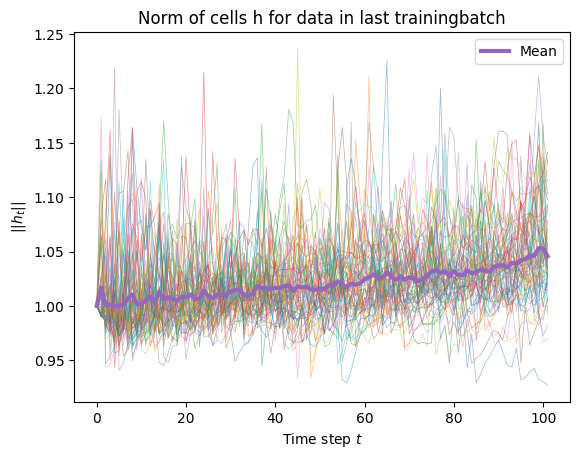

Mean norm:  1.0202909


In [15]:
htss = model1.hts.norm(dim=2)
htss = htss.cpu().detach().numpy()
plot_norm(htss,avg_only=False)

### Tuning curves

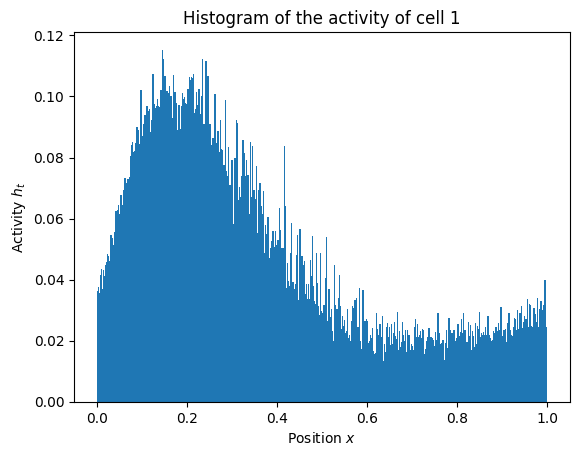

In [28]:
activity, bin_edges = tuning_curve(model1)
plot_tuning_curve(activity,bin_edges,1,spherical=False,linear=False,scale_to_one=True, plot_head_frac=1/32)

### Low dimensional representations

Explained variance for PCA with 2 components: 91.346 %


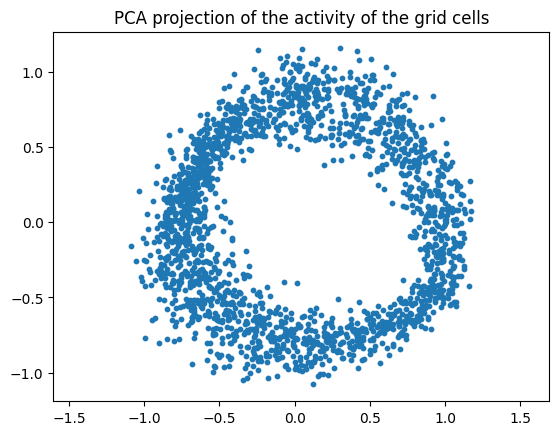

In [29]:
embedding, reducer = lowD_reduce(activity,if_pca=True,n_components=2,plot=True)

### Accuracy testing

In [30]:
angs, dy, err, y_hat, y = test_angle_inference(model1,reducer)


Mean error:  0.10669352798998225


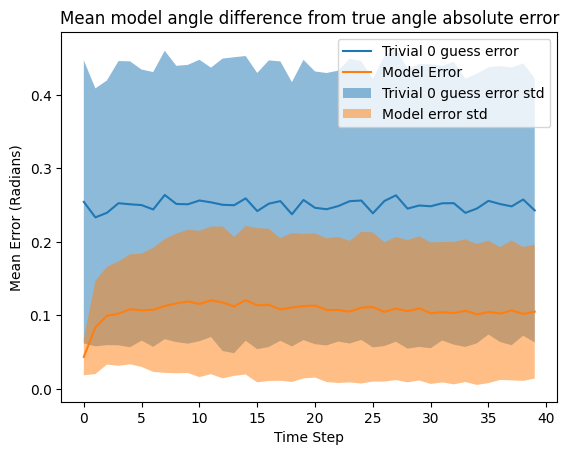

In [31]:
plot_accuracy(angs,dy,y_hat,y)

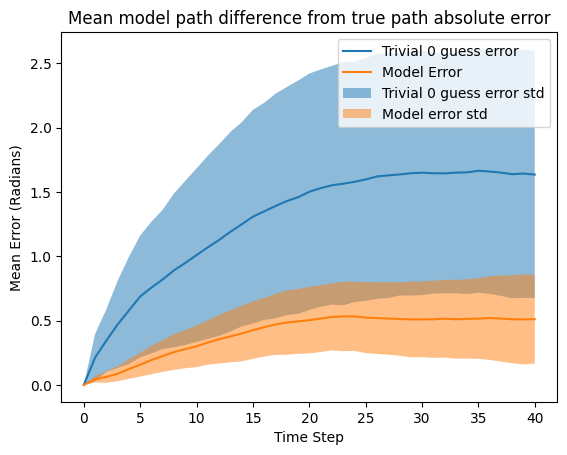

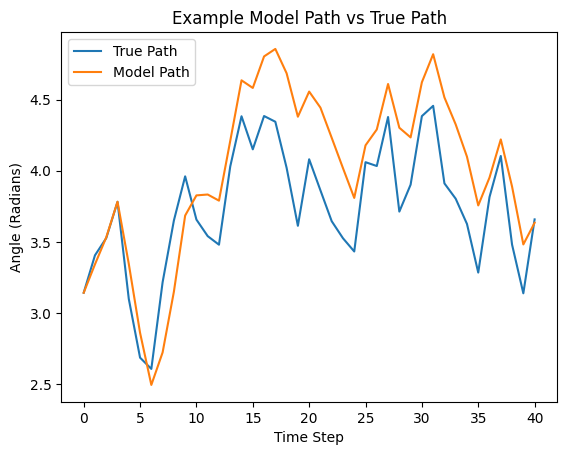

In [32]:
plot_path_accuracy(angs,y,example_path=3)